In [ ]:
library(MASS)
library(ggplot2)

In [138]:
# Import functions from external R files
cat("Loading external R files...\n")

source("Data_load.R") 
cat("✓ Data_load.R loaded\n")

source("Data_visualization.R")  
cat("✓ Data_visualization.R loaded\n")

cat("All functions loaded successfully!\n")

Loading external R files...
✓ Data_load.R loaded
✓ Data_visualization.R loaded
✓ Data_load.R loaded
✓ Data_visualization.R loaded
All functions loaded successfully!
All functions loaded successfully!


In [123]:
# Load data using the load_data function from Data_load.R
data_clean <- load_data("data_cleaned.csv")

head(data_clean)
attach(data_clean)

,individual_id,predator,predator_taxon,predator_lifestage,type_of_feeding_interaction,standardised_predator_length,si_predator_mass,diet_coverage,prey,prey_taxon,⋯,si_prey_mass,geographic_location,latitude,longitude,depth,mean_annual_temp,sd_annual_temp,mean_pp,sd_pp,specific_habitat
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<chr>
1,1,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,93.990,1539.900,all,teleosts/molluscs/crustaceans,mixed,⋯,14.2740,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
2,2,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,95.195,1597.800,all,teleosts/molluscs/crustaceans,mixed,⋯,6.0213,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
3,3,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,100.020,1843.600,all,teleosts/molluscs/crustaceans,mixed,⋯,11.8930,"""""Apalachicola Bay"","" Florida""""","29""""nN","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
4,4,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,34.945,87.631,all,teleosts/molluscs/crustaceans,mixed,⋯,8.1220,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
5,5,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,31.330,63.866,all,teleosts/molluscs/crustaceans,mixed,⋯,6.5623,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay
6,6,Rhizoprionodon terraenovae,ectotherm vertebrate,adult,predacious/piscivorous,33.740,79.161,all,teleosts/molluscs/crustaceans,mixed,⋯,5.4065,"""""Apalachicola Bay"","" Florida""""","29""""40'N","85""""10'W",30,24.1,4.2,866,214,Coastal Bay


The following object is masked _by_ .GlobalEnv:

    si_prey_length


The following objects are masked from data_clean (pos = 3):

    depth, diet_coverage, geographic_location, individual_id, latitude,
    longitude, mean_annual_temp, mean_pp, predator, predator_lifestage,
    predator_taxon, prey, prey_taxon, sd_annual_temp, sd_pp,
    si_predator_mass, si_prey_length, si_prey_mass, specific_habitat,
    standardised_predator_length, type_of_feeding_interaction


The following objects are masked from data_clean (pos = 4):

    depth, diet_coverage, geographic_location, individual_id, latitude,
    longitude, mean_annual_temp, mean_pp, predator, predator_lifestage,
    predator_taxon, prey, prey_taxon, sd_annual_temp, sd_pp,
    si_predator_mass, si_prey_length, si_prey_mass, specific_habitat,
    standardised_predator_length, type_of_feeding_interaction


The following objects are masked from data_clean (pos = 6):

    depth, diet_coverage, geographic_location, individual_id, latitud

In [118]:
# Check column names to see the correct column names
names(data_clean)

[1] "individual_id"                "predator"                    
 [3] "predator_taxon"               "predator_lifestage"          
 [5] "type_of_feeding_interaction"  "standardised_predator_length"
 [7] "si_predator_mass"             "diet_coverage"               
 [9] "prey"                         "prey_taxon"                  
[11] "si_prey_length"               "si_prey_mass"                
[13] "geographic_location"          "latitude"                    
[15] "longitude"                    "depth"                       
[17] "mean_annual_temp"             "sd_annual_temp"              
[19] "mean_pp"                      "sd_pp"                       
[21] "specific_habitat"

In [5]:
# Check the structure and sample values of the relevant columns
str(data_clean$standardised_predator_length)
head(data_clean$standardised_predator_length, 20)

str(data_clean$si_prey_length)  
head(data_clean$si_prey_length, 20)

 num [1:34931] 94 95.2 100 34.9 31.3 ...


[1]  93.990  95.195 100.020  34.945  31.330  33.740  32.535  35.548  33.740
[10]  33.740  34.945  33.740  38.560  34.343  31.330  31.330  36.150  36.150
[19]  33.138  34.343

 num [1:34931] 11.26 8.44 10.6 9.33 8.69 ...


[1] 11.2590  8.4443 10.5950  9.3301  8.6900  8.1465  7.6371  8.4262  8.8580
[10]  8.2417  7.7439  7.1797  6.2192  3.1762  8.1465  8.6037  7.5274  8.6900
[19]  7.6371  8.3149

In [6]:
# Convert columns to numeric (though they appear to already be numeric)
data_clean$standardised_predator_length <- as.numeric(data_clean$standardised_predator_length)
data_clean$si_prey_length <- as.numeric(data_clean$si_prey_length)

In [89]:
si_predator_length <- data_clean$standardised_predator_length
si_prey_length <- data_clean$si_prey_length

In [90]:
summary(si_predator_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.30   28.92   68.00   68.36   94.00  309.69 

In [91]:
summary(si_prey_length)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00042   2.19945   5.00000   8.12815  12.00000 122.66000 

# Predator Analysis

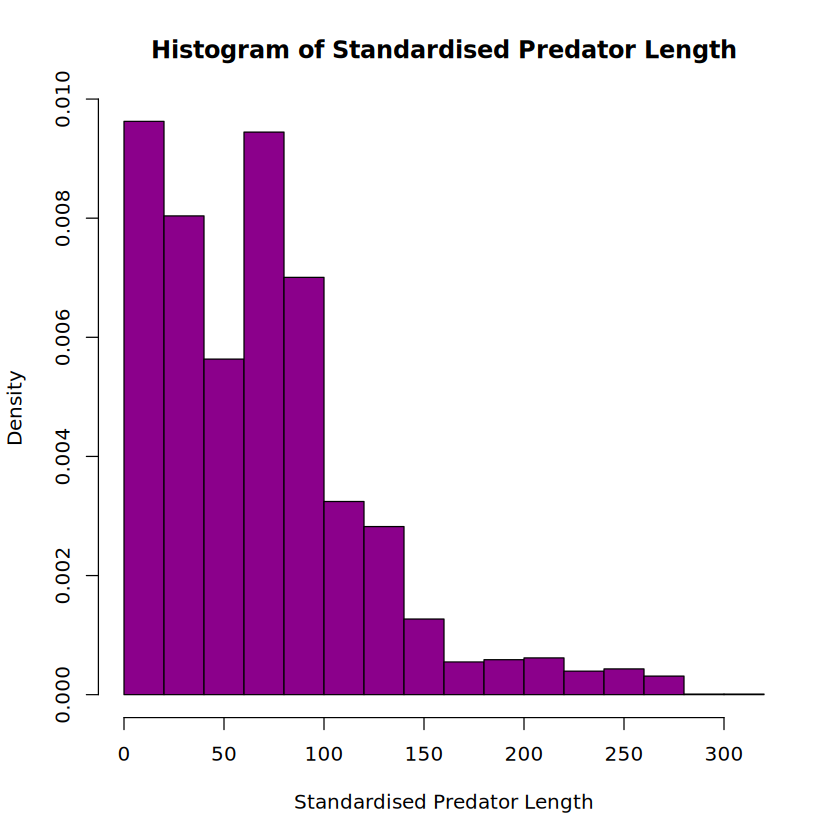

In [79]:
hist(si_predator_length,
     main = "Histogram of Standardised Predator Length",
     xlab = "Standardised Predator Length",
     col="darkmagenta",
     freq=FALSE
     )

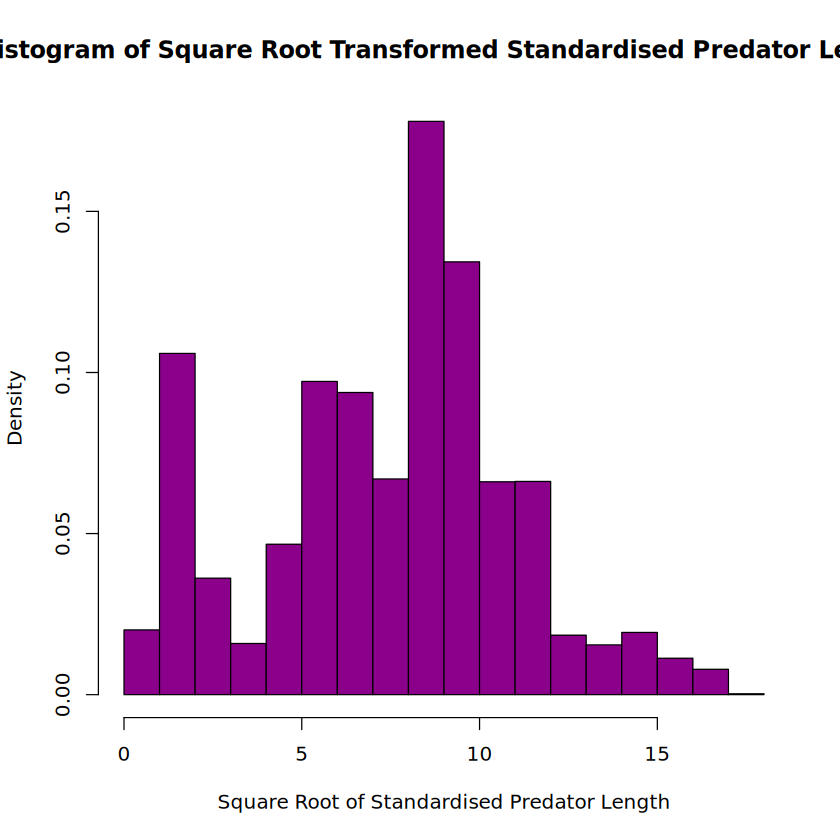

In [ ]:
sqrt_predator_length <- sqrt(si_predator_length)
hist(sqrt_predator_length,
     main = "Histogram of Square Root Transformed Standardised Predator Length",
     xlab = "Square Root of Standardised Predator Length",
     col="darkmagenta",
     freq=FALSE
     )

Original data points: 34931 
Filtered data points: 34896 
Removed 35 problematic values
Using threshold: 0.4466 
Estimated Weibull parameters:
Shape: 1.0961 
Scale: 70.482 
✓ Transformation completed successfully!


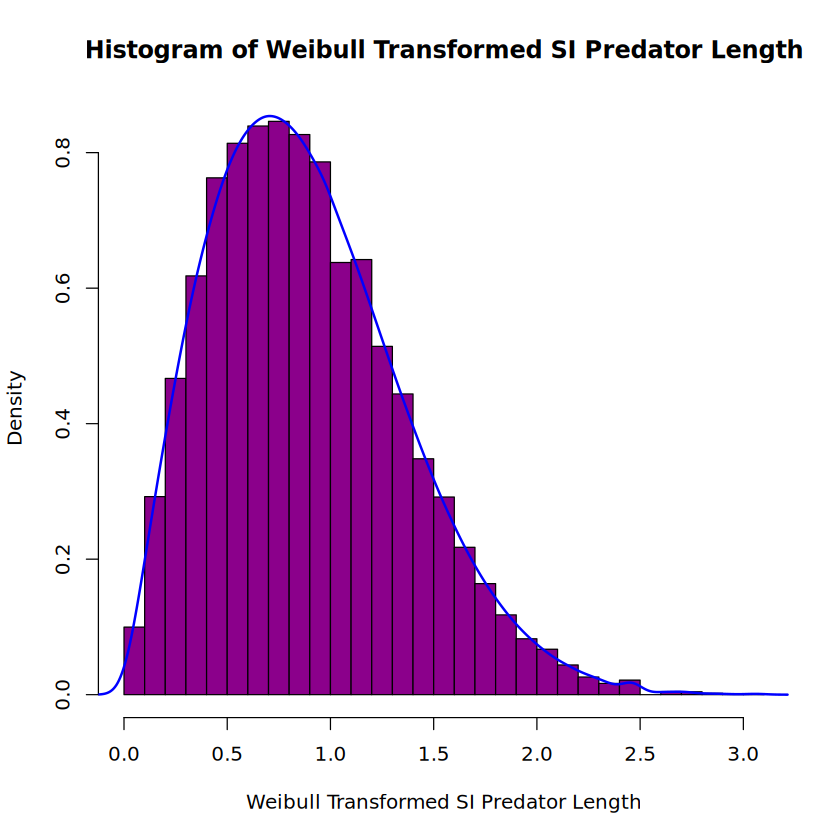

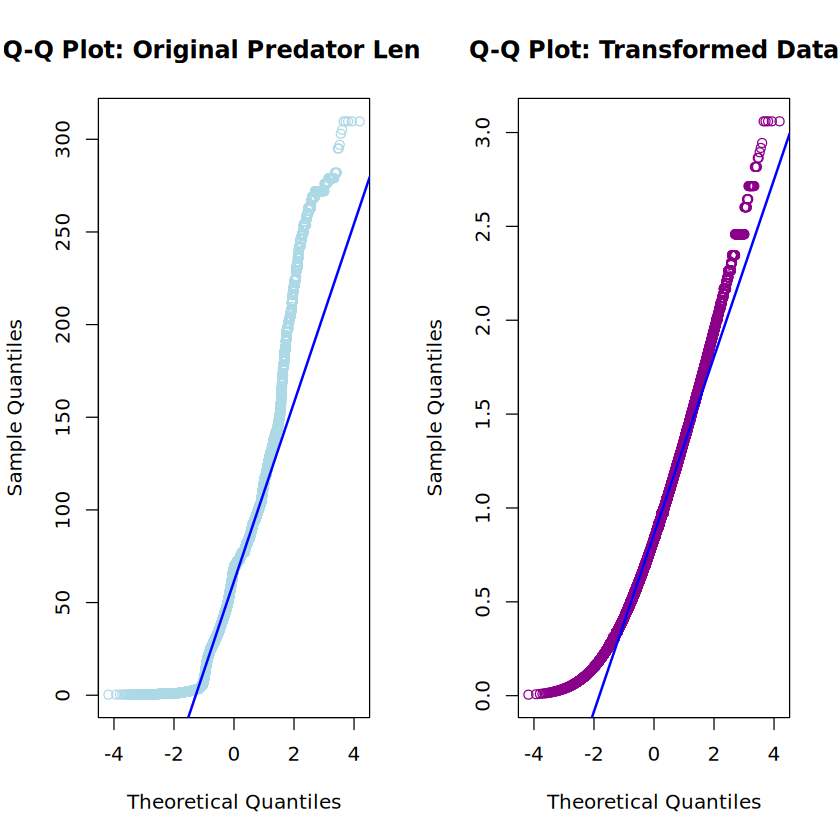

In [139]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_pred_length <- weibull_transformation(si_predator_length)

# Create plots using the visualization functions
hist_plot(weibull_transformed_pred_length, 
          main = "Histogram of Weibull Transformed SI Predator Length", 
          xlab = "Weibull Transformed SI Predator Length")

qq_plot_comparison(si_predator_length, weibull_transformed_pred_length,
                  title_original = "Q-Q Plot: Original Predator Length")

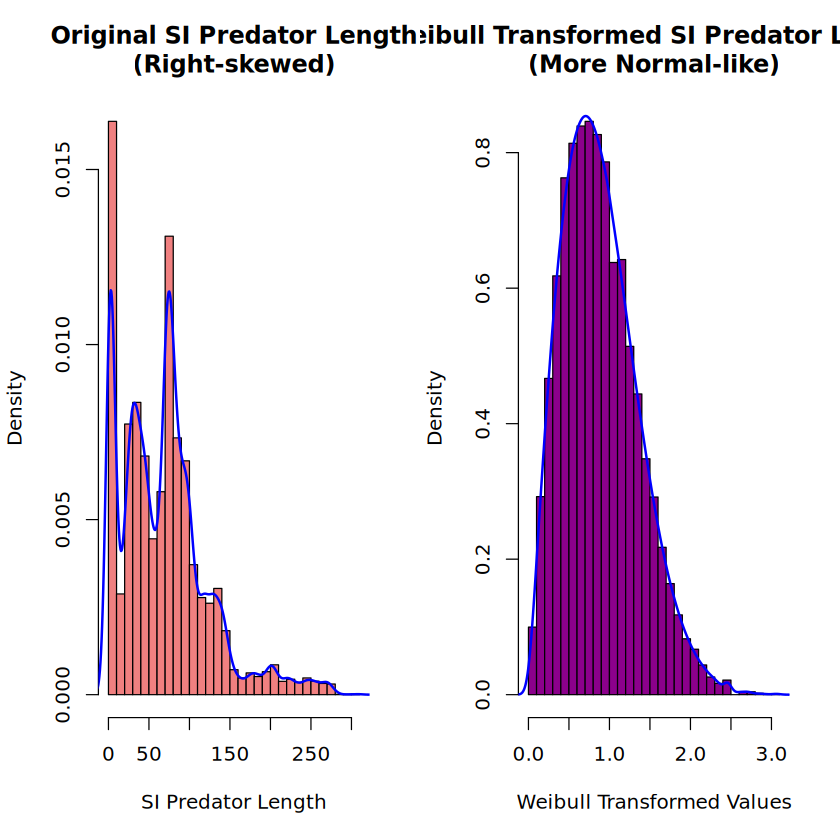

In [141]:
# Compare original vs Weibull transformed data side by side
par(mfrow=c(1,2))

# Original data
hist_plot(si_predator_length,
     main = "Original SI Predator Length\n(Right-skewed)",
     xlab = "SI Predator Length",
     color = "lightcoral")

# Weibull transformed data (uses default darkmagenta color)
hist_plot(weibull_transformed_pred_length,
     main = "Weibull Transformed SI Predator Length\n(More Normal-like)",
     xlab = "Weibull Transformed Values")

# Reset plotting parameters
par(mfrow=c(1,1))

# --------------
# Prey Analysis
# --------------

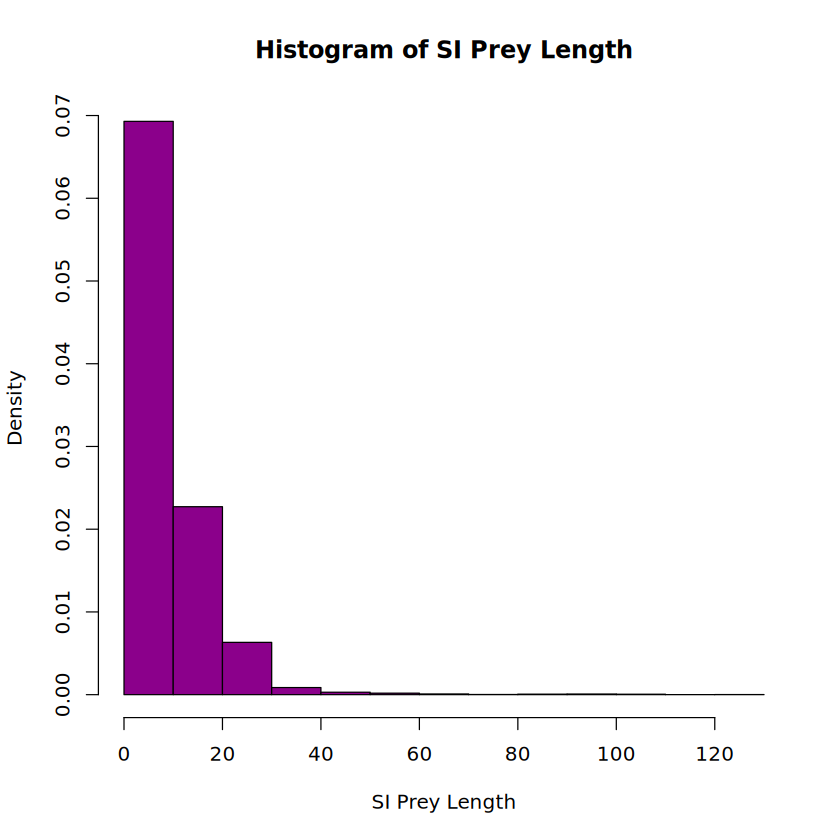

In [156]:
hist(si_prey_length,
     main = "Histogram of SI Prey Length",
     xlab = "SI Prey Length",
     col="darkmagenta",
     freq=FALSE
     )

In [157]:
# Debug the data to find problematic values
cat("Summary of si_prey_length:\n")
print(summary(si_prey_length))
cat("\nNumber of zero values:", sum(si_prey_length == 0, na.rm = TRUE), "\n")
cat("Number of negative values:", sum(si_prey_length < 0, na.rm = TRUE), "\n")
cat("Number of NA values:", sum(is.na(si_prey_length)), "\n")
cat("Minimum value:", min(si_prey_length, na.rm = TRUE), "\n")
cat("Maximum value:", max(si_prey_length, na.rm = TRUE), "\n")

Summary of si_prey_length:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00042   2.19945   5.00000   8.12815  12.00000 122.66000 

Number of zero values: 0 
Number of negative values: 0 
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
  0.00042   2.19945   5.00000   8.12815  12.00000 122.66000 

Number of zero values: 0 
Number of negative values: 0 
Number of NA values: 0 
Minimum value: 0.000416 
Maximum value: 122.66 
Number of NA values: 0 
Minimum value: 0.000416 
Maximum value: 122.66 


Original data points: 34931 
Filtered data points: 31959 
Removed 2972 problematic values
Using threshold: 0.1 
Estimated Weibull parameters:
Shape: 1.0402 
Scale: 9.0257 
✓ Transformation completed successfully!


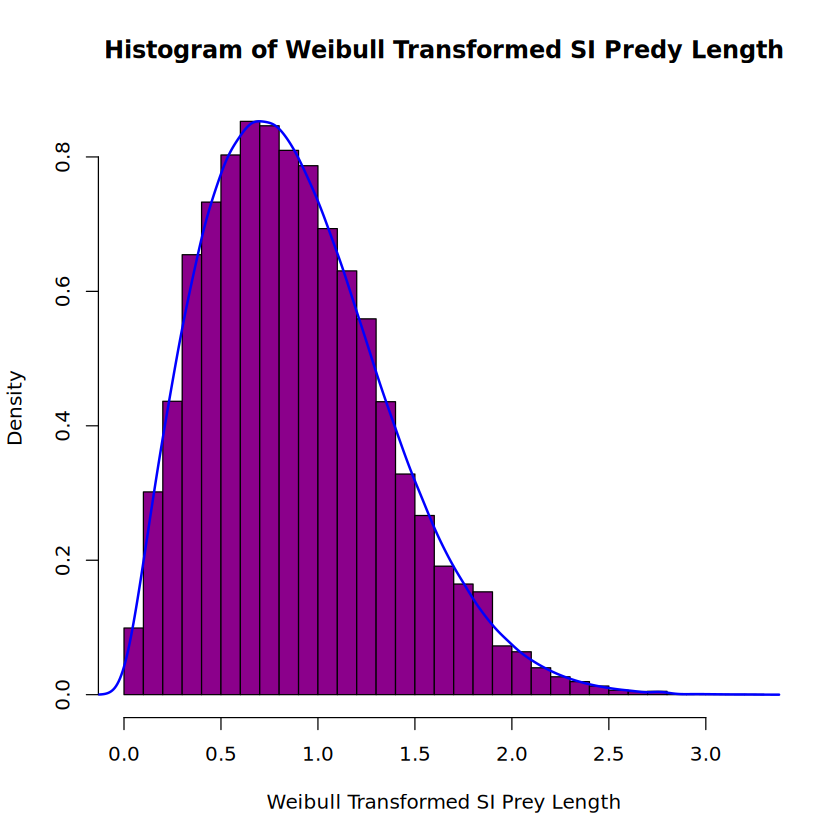

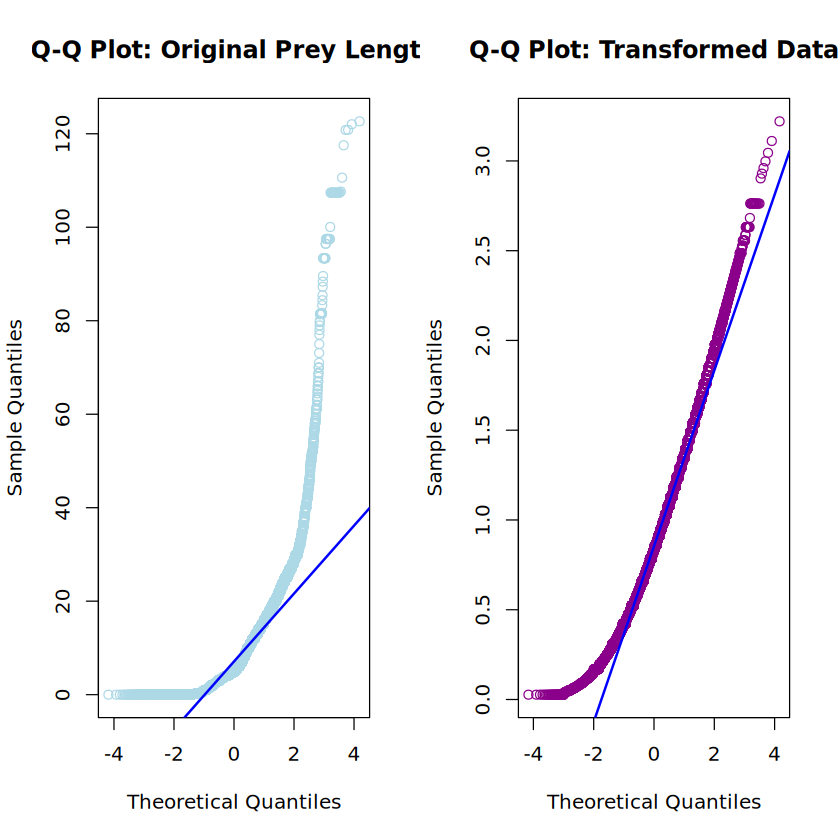

In [158]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_prey_length <- weibull_transformation(si_prey_length)

# Create plots using the visualization functions
hist_plot(weibull_transformed_prey_length, 
          main = "Histogram of Weibull Transformed SI Predy Length", 
          xlab = "Weibull Transformed SI Prey Length")

qq_plot_comparison(si_prey_length, weibull_transformed_prey_length,
                  title_original = "Q-Q Plot: Original Prey Length")

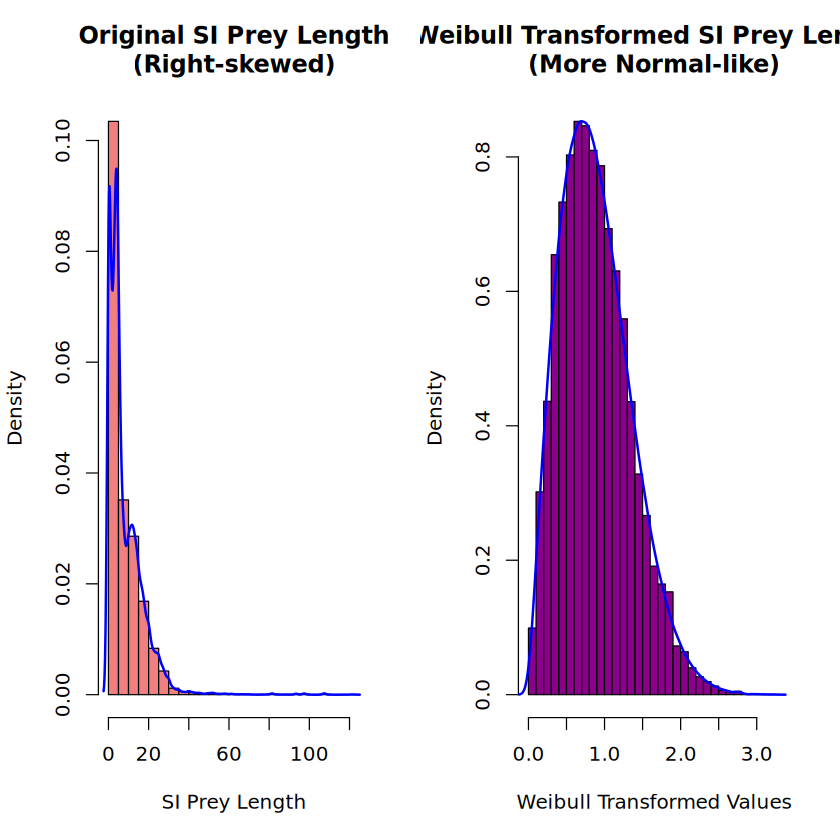

In [159]:
# Compare original vs Weibull transformed data side by side
par(mfrow=c(1,2))

# Original data
hist_plot(si_prey_length,
     main = "Original SI Prey Length\n(Right-skewed)",
     xlab = "SI Prey Length",
     color="lightcoral",
     )

# Weibull transformed data  
hist_plot(weibull_transformed_prey_length,
     main = "Weibull Transformed SI Prey Length\n(More Normal-like)",
     xlab = "Weibull Transformed Values",
     )

# Reset plotting parameters
par(mfrow=c(1,1))

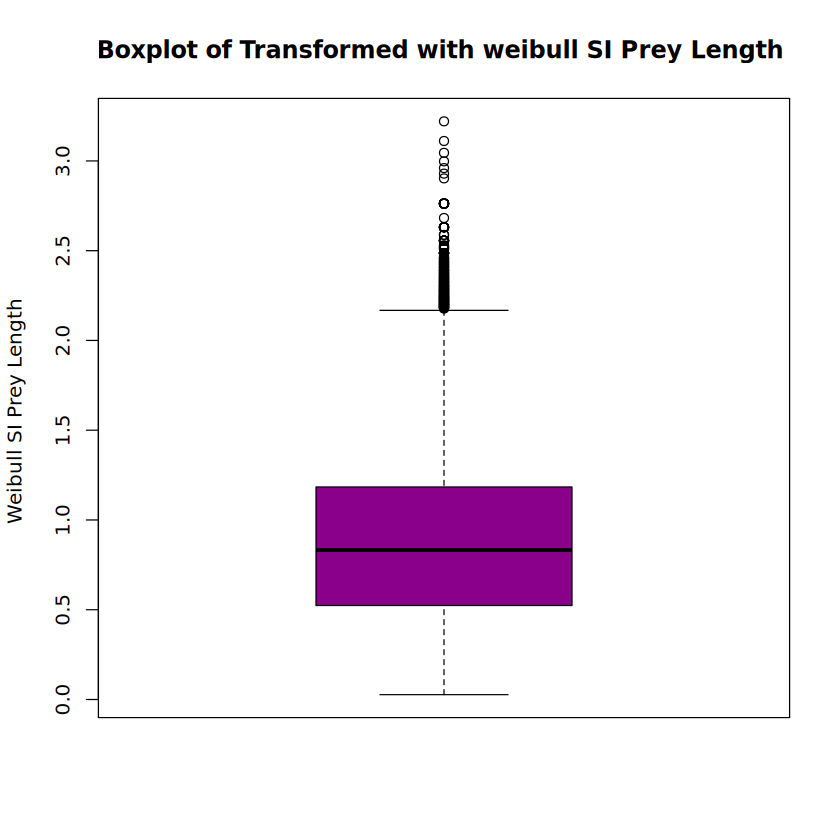

In [160]:
boxplot(weibull_transformed_prey_length,
        main = "Boxplot of Transformed with weibull SI Prey Length ",
        ylab = "Weibull SI Prey Length ",
        col="darkmagenta"
        )

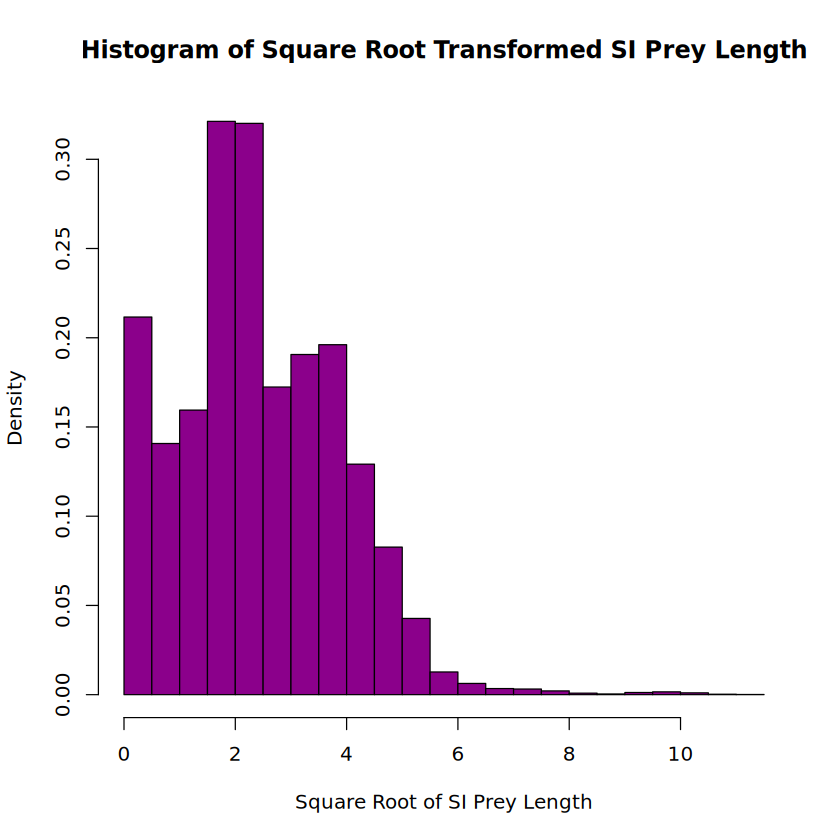

In [ ]:
sqrt_prey_length <- sqrt(si_prey_length)
hist(sqrt_prey_length,
     main = "Histogram of Square Root Transformed SI Prey Length",
     xlab = "Square Root of SI Prey Length",
     col="darkmagenta",
     freq=FALSE
     )

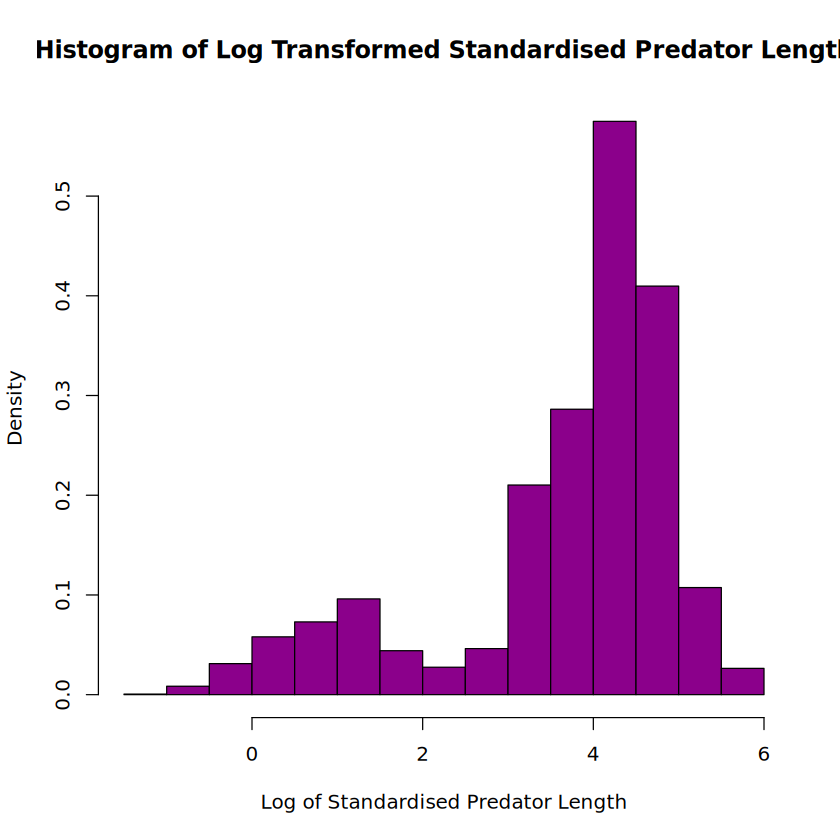

In [ ]:
log_predator_length <- log(si_predator_length)
hist(log_predator_length,
     main = "Histogram of Log Transformed Standardised Predator Length",   
     xlab = "Log of Standardised Predator Length",                 
     col="darkmagenta",
     freq=FALSE
     )                 

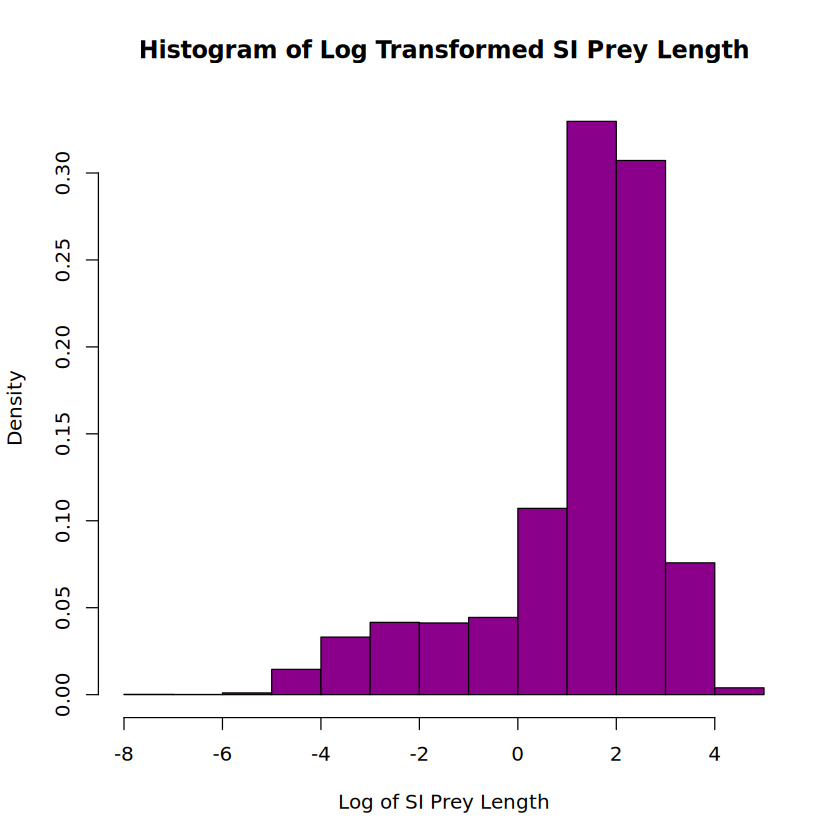

In [ ]:
log_prey_length = log(si_prey_length)
hist(log_prey_length,
     main = "Histogram of Log Transformed SI Prey Length",
     xlab = "Log of SI Prey Length",
     col="darkmagenta",
     freq=FALSE
     )

In [119]:
si_prey_length_clean <- remove_outliers(data_clean$si_prey_length)

In [144]:
# Check how many outliers were removed
original_count <- length(data_clean$si_prey_length)
clean_count <- sum(!is.na(si_prey_length_clean))
outliers_removed <- original_count - clean_count

cat("Original data points:", original_count, "\n")
cat("Clean data points:", clean_count, "\n") 
cat("Outliers removed:", outliers_removed, "\n")
cat("Percentage of outliers:", round((outliers_removed/original_count)*100, 2), "%\n")

Original data points: 34931 
Clean data points: 33809 
Outliers removed: 1122 
Percentage of outliers: 3.21 %
Clean data points: 33809 
Outliers removed: 1122 
Percentage of outliers: 3.21 %


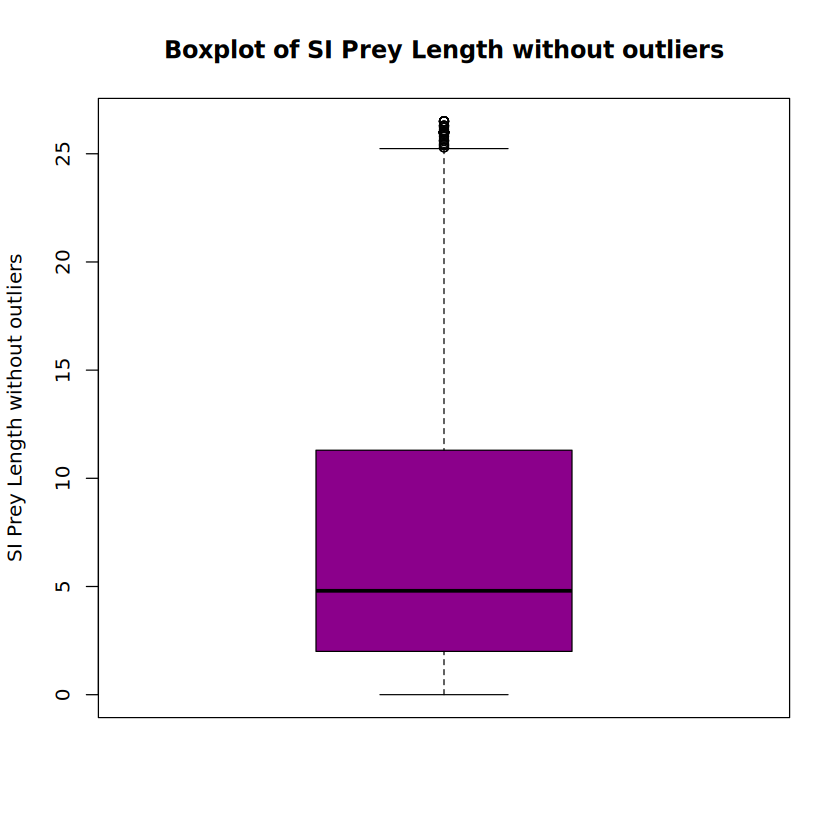

In [152]:
boxplot(si_prey_length_clean,
        main = "Boxplot of SI Prey Length without outliers",
        ylab = "SI Prey Length without outliers",
        col="darkmagenta"
        )

Original data points: 34931 
Filtered data points: 30837 
Removed 4094 problematic values
Using threshold: 0.1 
Estimated Weibull parameters:
Shape: 1.1555 
Scale: 8.1876 
✓ Transformation completed successfully!


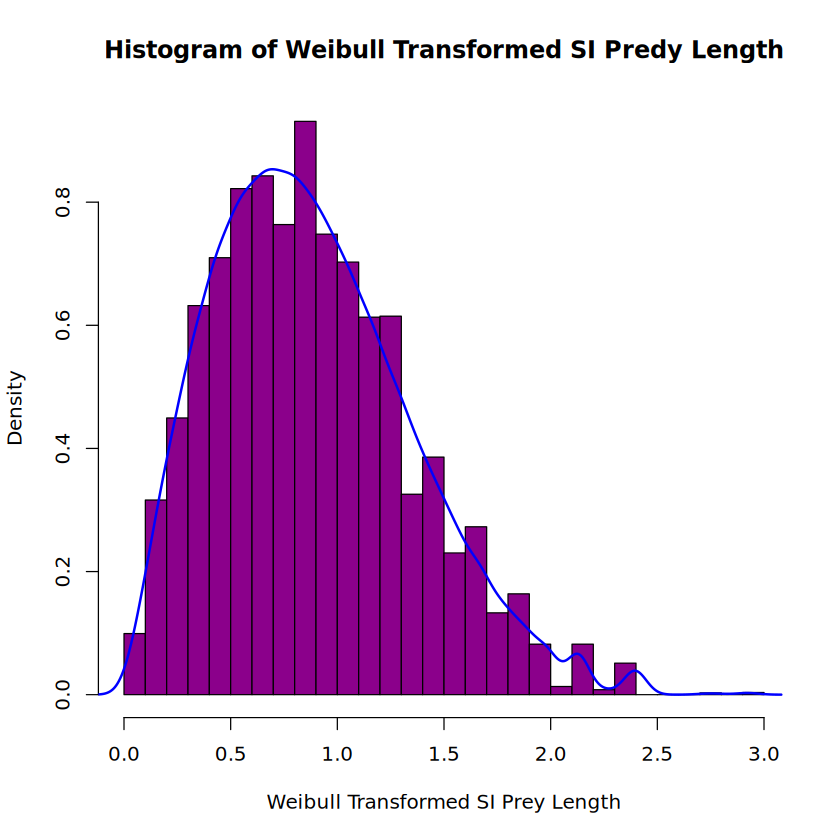

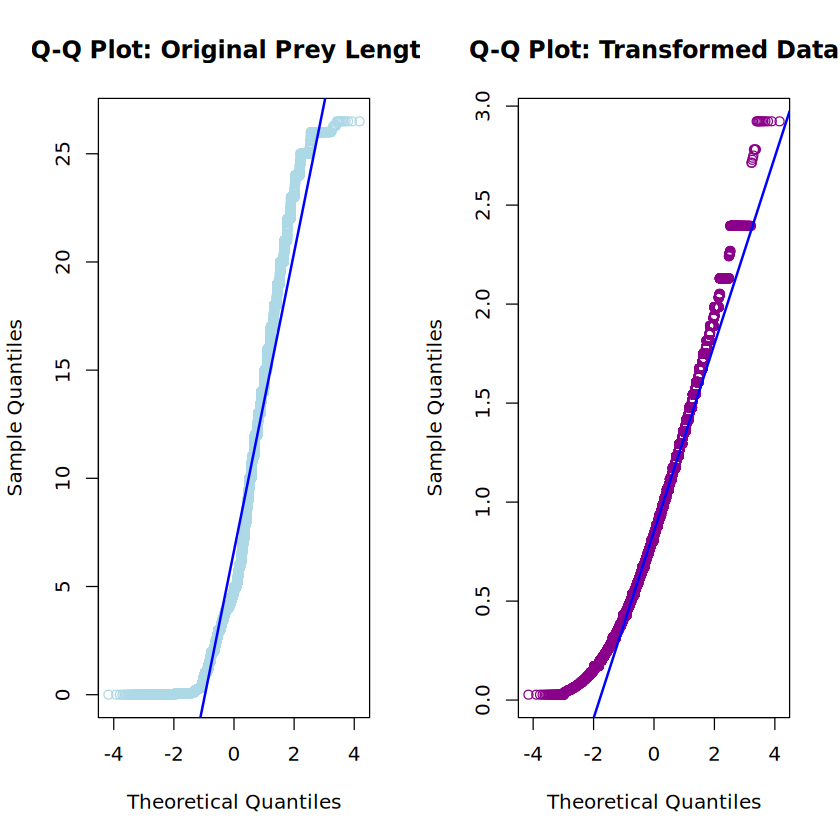

In [153]:
# Clean approach: Use the improved weibull_transformation function
weibull_transformed_prey_length_clean <- weibull_transformation(si_prey_length_clean)

# Create plots using the visualization functions
hist_plot(weibull_transformed_prey_length_clean, 
          main = "Histogram of Weibull Transformed SI Predy Length", 
          xlab = "Weibull Transformed SI Prey Length")

qq_plot_comparison(si_prey_length_clean, weibull_transformed_prey_length_clean,
                  title_original = "Q-Q Plot: Original Prey Length")

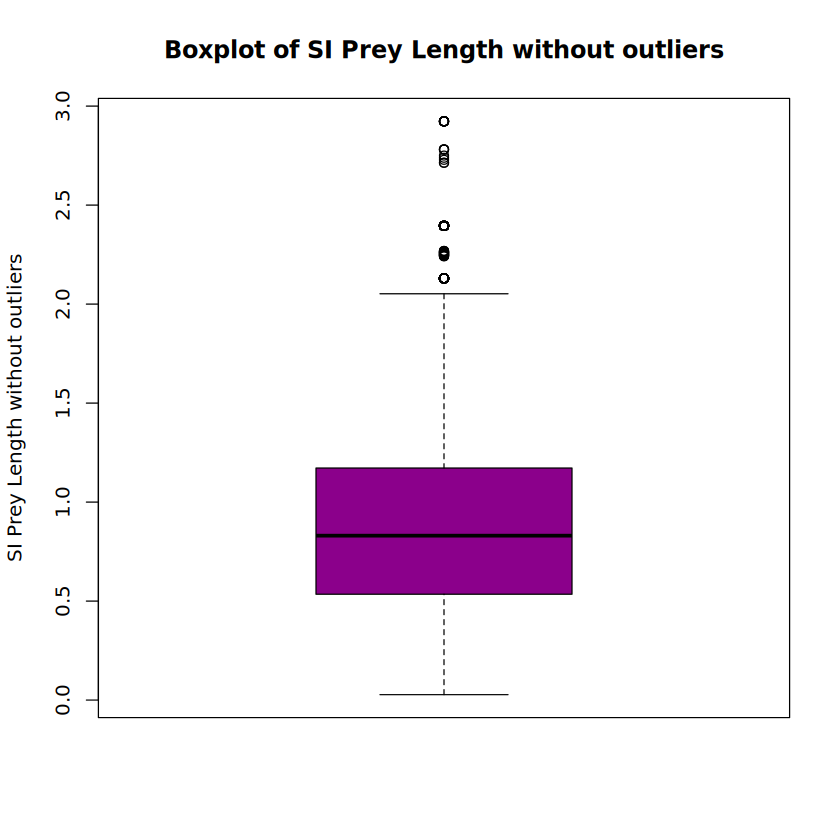

In [154]:
boxplot(weibull_transformed_prey_length_clean,
        main = "Boxplot of SI Prey Length without outliers",
        ylab = "SI Prey Length without outliers",
        col="darkmagenta"
        )

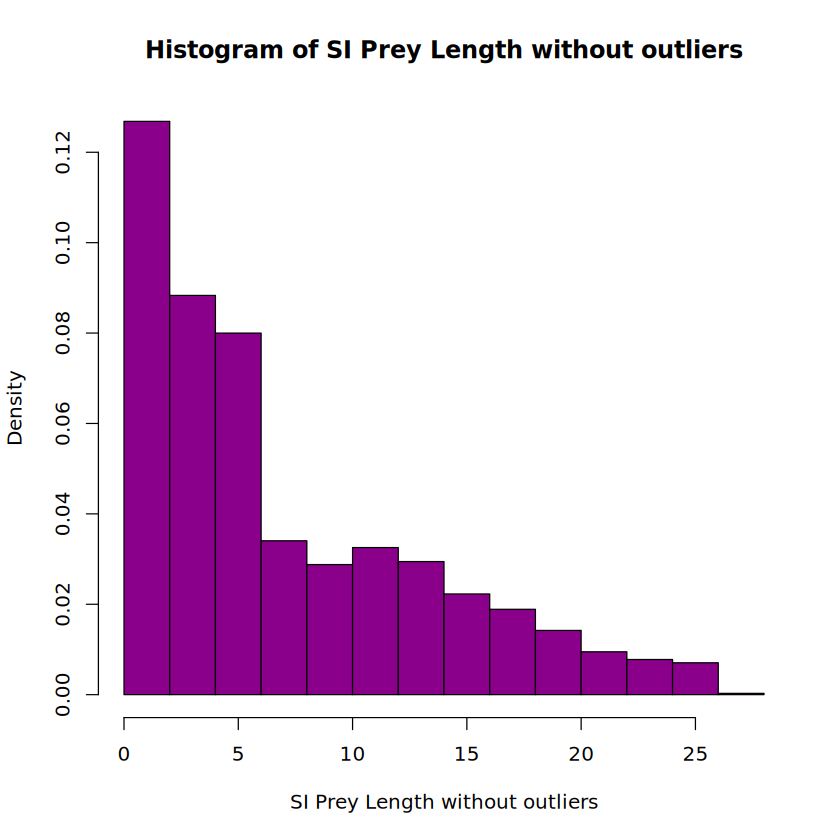

In [34]:
hist(si_prey_length_clean,
     main = "Histogram of SI Prey Length without outliers",
     xlab = "SI Prey Length without outliers",
     col="darkmagenta",
     freq=FALSE
     )

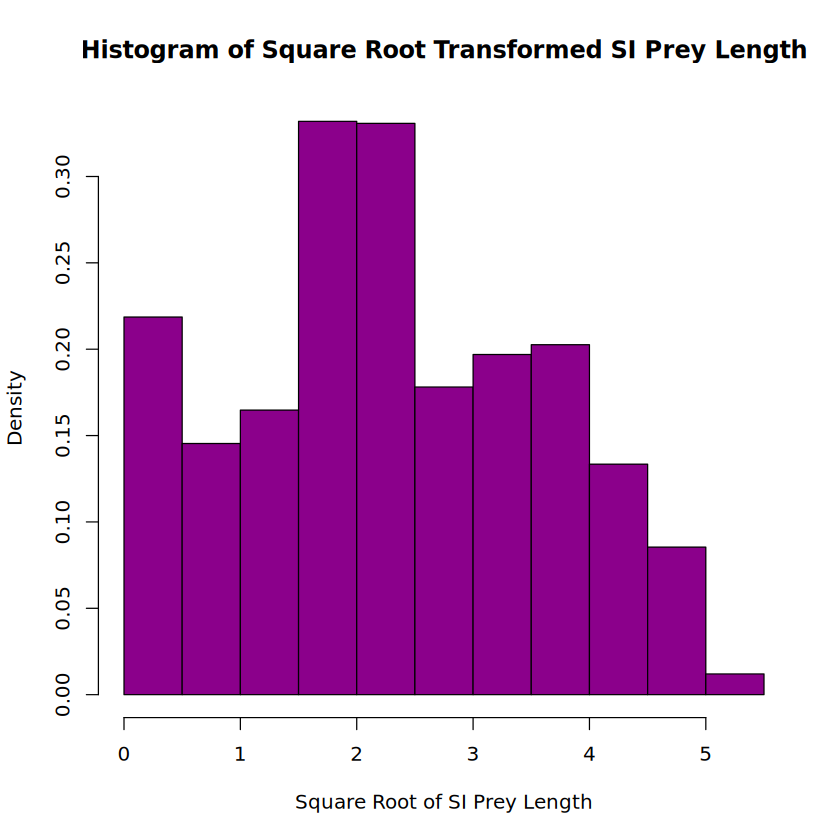

In [35]:
sqrt_prey_length_clean = sqrt(si_prey_length_clean)
hist(sqrt_prey_length_clean,
     main = "Histogram of Square Root Transformed SI Prey Length",
     xlab = "Square Root of SI Prey Length",
     col="darkmagenta",
     freq=FALSE
     )

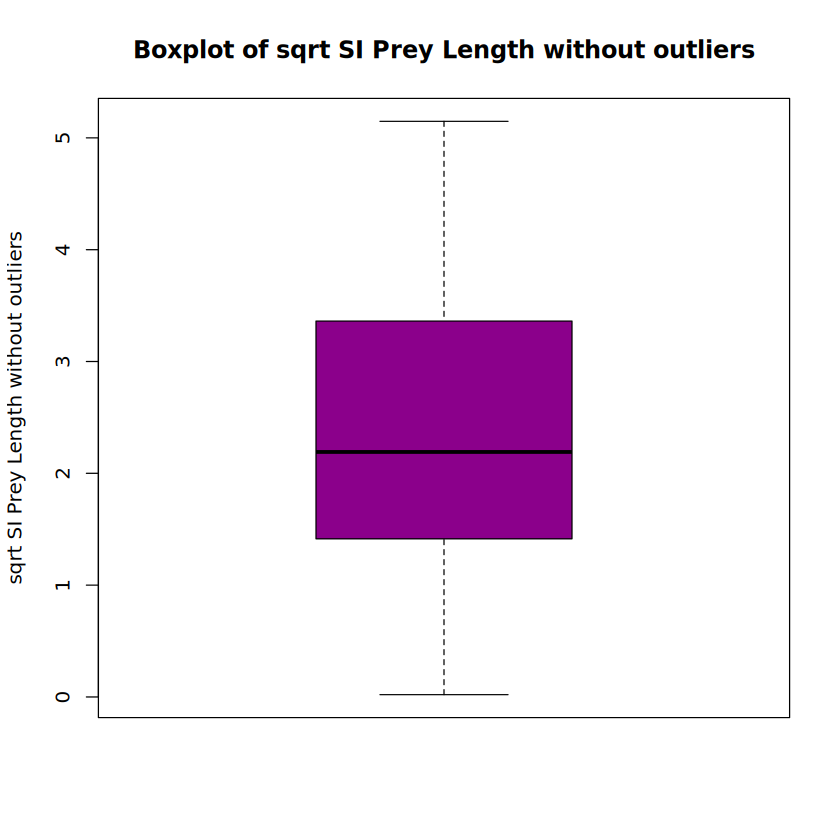

In [62]:
boxplot(sqrt_prey_length_clean,
        main = "Boxplot of sqrt SI Prey Length without outliers",
        ylab = "sqrt SI Prey Length without outliers",
        col="darkmagenta"
        )

# ----------------------
# Predator-Prey Analysis
# ----------------------

In [151]:
plot(weibull_transformed_pred_length, weibull_transformed_prey_length_clean,
     main = "Transformed Standardised Predator Length vs SI Prey Length without outliers",
     xlab = "Transformed Standardised Predator Length",
     ylab = "Transformed SI Prey Length without outliers",
     col="darkmagenta",
     pch=19
     )

ERROR: Error: object 'weibull_transformed_prey_length_clean' not found


In [ ]:
plot(, sqrt_prey_length_clean,
     main = "Scatterplot of Square Root Transformed Standardised Predator Length vs SI Prey Length without outliers",
     xlab = "Square Root of Standardised Predator Length",
     ylab = "Square Root of SI Prey Length without outliers",
     col="darkmagenta",
     pch=19
     )